## PART A
• PROJECT OBJECTIVE: To Build a model that will help to identify the potential customers who have a higher probability to churn. This helps the company to understand the pinpoints and patterns of customer churn and will increase the focus on strategizing customer retention.

• STEPS AND TASK [30 Marks]:

1. Data Understanding & Exploration: [5 Marks]

In [1356]:
#importing required packages

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score

A. Read ‘TelcomCustomer-Churn_1.csv’ as a DataFrame and assign it to a variable. [1 Mark]

In [1357]:
churnDF1 = pd.read_csv("TelcomChurn1.csv")  # reading telecom customer curn1 csv file

In [1358]:
churnDF1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   customerID       7043 non-null   object
 1   gender           7043 non-null   object
 2   SeniorCitizen    7043 non-null   int64 
 3   Partner          7043 non-null   object
 4   Dependents       7043 non-null   object
 5   tenure           7043 non-null   int64 
 6   PhoneService     7043 non-null   object
 7   MultipleLines    7043 non-null   object
 8   InternetService  7043 non-null   object
 9   OnlineSecurity   7043 non-null   object
dtypes: int64(2), object(8)
memory usage: 550.4+ KB


**--**  
**Churn1 file has 10 dimensions with 7043 observations.**  
**Senior Citizen is categorical variable, but the data type is int, we need to convert into category**  
**tenure is int type, remaining all other attributes are Strings**

B. Read ‘TelcomCustomer-Churn_2.csv’ as a DataFrame and assign it to a variable. [1 Mark]

In [1359]:
churnDF2 = pd.read_csv("TelcomChurn2.csv") # reading telecom customer curn1 csv file

In [1360]:
churnDF2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   OnlineBackup      7043 non-null   object 
 2   DeviceProtection  7043 non-null   object 
 3   TechSupport       7043 non-null   object 
 4   StreamingTV       7043 non-null   object 
 5   StreamingMovies   7043 non-null   object 
 6   Contract          7043 non-null   object 
 7   PaperlessBilling  7043 non-null   object 
 8   PaymentMethod     7043 non-null   object 
 9   MonthlyCharges    7043 non-null   float64
 10  TotalCharges      7043 non-null   object 
 11  Churn             7043 non-null   object 
dtypes: float64(1), object(11)
memory usage: 660.4+ KB


**--**  
**Churn2 file has 12 dimensions with 7043 observations.**    
**MonthlyCharges is float data type**  
**TotalCharges is string data type that need to be converted to float**  
**remaining all other attributes are Strings**

C. Merge both the DataFrames on key ‘customerID’ to form a single DataFrame [2 Mark]

In [1361]:
custDF = pd.merge(churnDF1,churnDF2, on='customerID') # merging churn1 and churn 2 data sets

**--**  
**Merging data frames  churnDF1,churnDF2 using customerID**

D. Verify if all the columns are incorporated in the merged DataFrame by using simple comparison Operator in Python. [1 Marks]

In [1362]:
print(churnDF1.columns.difference(custDF.columns))
print(churnDF2.columns.difference(custDF.columns))

Index([], dtype='object')
Index([], dtype='object')


**--**  
**Difference of churnDF1 and custDF is empty list. i.e all churnDF1 columns are there in custDF DataFrame**  
**And difference of churnDF2 and custDF is also empty list. i.e all churnDF2 columns are there in custDF DataFrame**

**All chrun1 and churn2 columns are available in custDF**

In [1363]:
custDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


2. Data Cleaning & Analysis: [5 Marks]

    A. Impute missing/unexpected values in the DataFrame. [2 Marks]

In [1364]:
custDF['TotalCharges'] = pd.to_numeric(custDF['TotalCharges'], errors='coerce')

**--**  
**convert string data type to float data type for TotalCharges,  For any error, fill it with NaN**


In [1365]:
custDF_null_percentages = 100 * (custDF.isnull().sum()/len(custDF))
custDF_null_percentages

customerID          0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.156183
Churn               0.000000
dtype: float64

**--**   
**15% values are missing in TotalCharges**  
**No missing data in remaining all other columns**

In [1366]:
custDF[['tenure','MonthlyCharges','TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


**In the distribution of Telecom Churn,** 

**For TotalCharges, Mean is grater than Median, this indicates that there is a positive skewness in the data**

**Tenure, Q2-Median is much closer to the minimum than it is for maximum. minimum=0 and maximum=72, this indicates, data is right skewed**

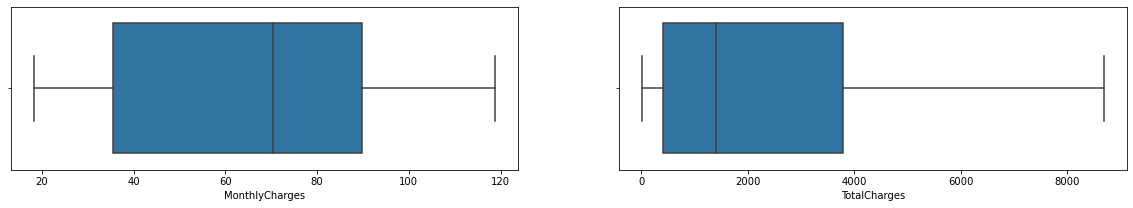

In [1367]:
numeric_col = custDF.columns[pd.Series(custDF.columns).apply(lambda x : custDF[x].dtype == 'float64')]  # Non object columns

plt.figure(figsize = (20,3))

j = 1
for i in numeric_col:
    plt.subplot(1,2,j)
    sns.boxplot(x=custDF[i]);
    j += 1

```
Gives 5 number summary for numerical values.

TotalCharges has mean=2243 and median=1400. As mean is grater than the median of tournament attribute, it has positive or right skewed distribution

No points outside the wishker, So, there are no outliers.
```

In [1368]:
numeric_col = custDF.columns[pd.Series(custDF.columns).apply(lambda x : custDF[x].dtype == 'float64')]  # Non object columns

for column in numeric_col:
    iqr=custDF[column].quantile(q=.75) - custDF[column].quantile(q=.25)
    upperfence=custDF[column].quantile(q=.75)+1.5*iqr
    lowerfence=custDF[column].quantile(q=.25)-1.5*iqr
    outliers=custDF[custDF[column] > upperfence]
    lowoutliers=custDF[custDF[column] < lowerfence]
    print(column,' : \n The number of outliers greater than the upper fence = ',outliers.shape[0])
    print(' The number of lowoutliers greater than the upper fence = ',lowoutliers.shape[0])

MonthlyCharges  : 
 The number of outliers greater than the upper fence =  0
 The number of lowoutliers greater than the upper fence =  0
TotalCharges  : 
 The number of outliers greater than the upper fence =  0
 The number of lowoutliers greater than the upper fence =  0


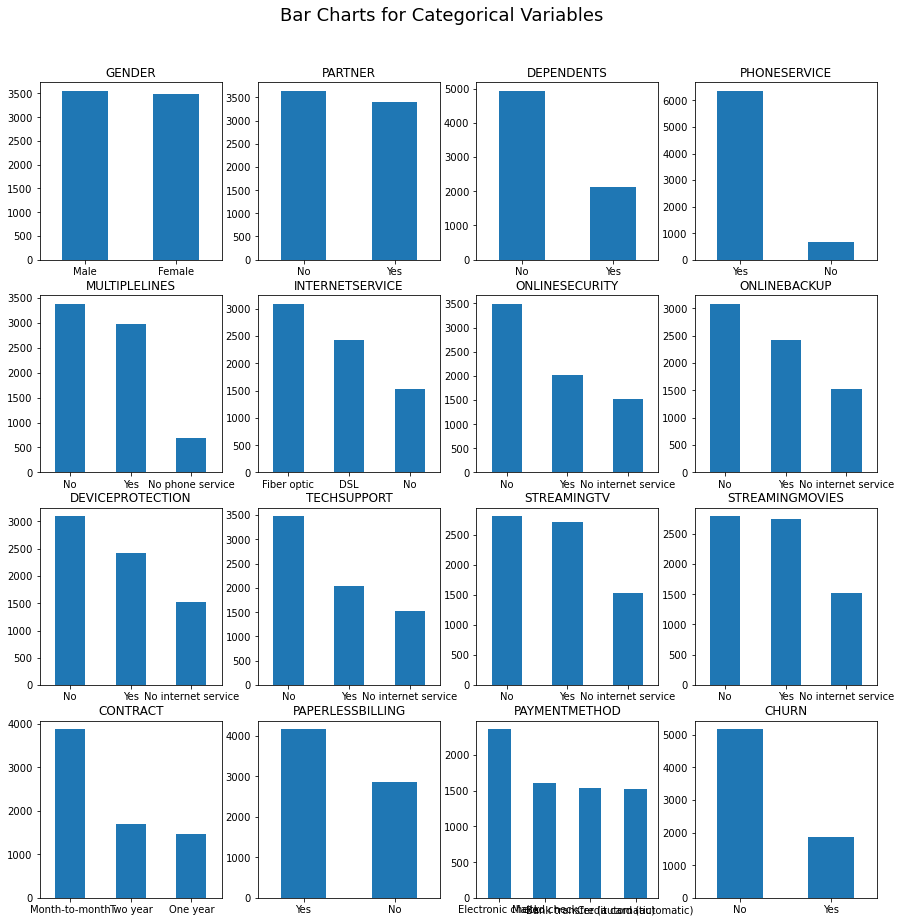

In [1369]:
categorical_col = custDF.drop(['customerID'], axis=1).columns[pd.Series(custDF.drop(['customerID'], axis=1).columns).apply(lambda x : custDF[x].dtype == 'object' )] 
plt.figure(figsize=(15, 15))
plt.subplots_adjust(hspace=0.2)
plt.subplots_adjust(wspace=0.2)
plt.suptitle("Bar Charts for Categorical Variables ", fontsize=18, y=0.95)
cols=4
rows = len(categorical_col) // cols + (len(categorical_col) % cols > 0)

for n, i in enumerate(categorical_col):
    ax = plt.subplot(rows, cols, n + 1)
    custDF[i].value_counts().plot(kind='bar',rot=0, ax=ax)
    ax.set_title(i.upper())
    ax.set_xlabel("")
    ax.set_ylabel("")
plt.show()

```
1. Pretty much equal number of Female and Male in Gender attribute
2. Pretty much equal number of Partner yes and no
3. 70% customers have no dependents
4. more than 90% of customer have yes Phoneservices, only 9% have no phoneservice. This feature will not add value to the model because of low variance
5. pretty much equal number of multiplelines yes and no
6. Internetservice is having 43% fiber Optics, 34% DSL and remaining no
7. Pretty much 50% of customer have no onlinesecurity, 28% yes online security
8. more than 1/3rd of customer have no onlinebackup and 1/3rd of customers have yes onlinebackup
9. more than 1/3rd of customer have no deviceprotection and 1/3rd have yes onlinebackup
10. Pretty much 50% of customer have no techsupport, 29% yes  techsupport
11. Pretty much equal number of StreamingTV yes and no
12. Pretty much equal number of StreamingMovies yes and no
13. More than 50% customer have month-to-month contract, 2yr contract are 24% and 1yr contract are 20%
14. 33% customers will do payment by Electoronic check and pretty much equal payment by credit card, bank statment and mailed check
15. 73% customer are not Churn and 26% customer are churn
```

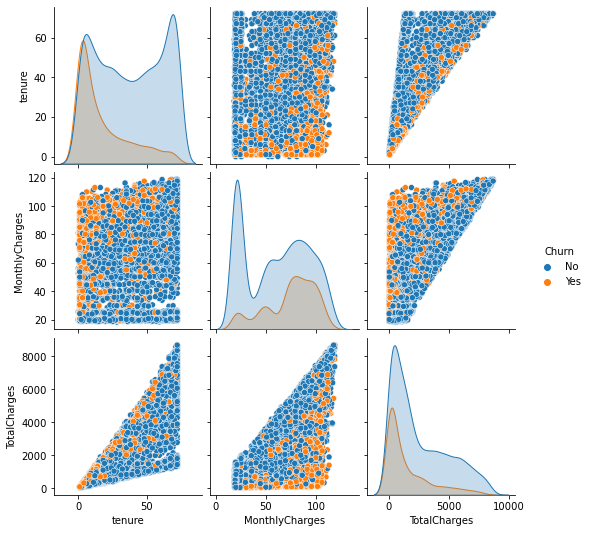

In [1370]:
cols=['tenure','MonthlyCharges','TotalCharges','Churn']
sns.pairplot(custDF[cols],hue='Churn');

**---**     
**There is a linear positive association from TotalCharges  to tenure,MonthlyCharges.**  
**The points distributed as cloud  between P_incidence and P_radius, Hence There is no linear association between the two** 
**The histogram of MonthlyCharges and TotalCharges shows the shape is right skewed** 



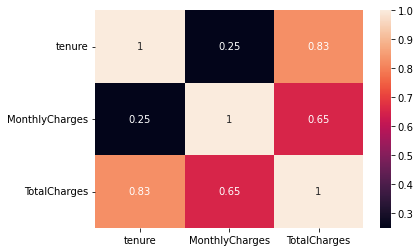

In [1371]:
sns.heatmap(custDF[cols].corr(), annot=True);

**---**   
**Strong positive correlation of 0.83 between TotalCharges and tenure**  
**Also MonthlyChares and TotalCharges are having positive correlationof 0.65**   

In [1372]:
custDF['TotalCharges']=custDF['TotalCharges'].fillna(custDF['TotalCharges'].median()) # replacing missing values with median

In [1373]:
custDF.isnull().sum() # checking null values

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

```

All null values are replaced with median value


```

B. Make sure all the variables with continuous values are of ‘Float’ type. [2 Marks]  
[For Example: MonthlyCharges, TotalCharges]

In [1374]:
custDF.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


```
   
   TotalCharges attribute is converted to float.
   MonthlyCharges already there in float data type.
    
    
```

C. Create a function that will accept a DataFrame as input and return pie-charts for all the appropriate Categorical features. Clearly show percentage distribution in the pie-chart. [4 Marks]

In [1375]:
# value counts for Categorical variables
print(custDF.Churn.value_counts())  
print('..............................')
print(custDF.gender.value_counts())
print('..............................')
print(custDF.OnlineBackup.value_counts())
print('..............................')
print(custDF.PaymentMethod.value_counts())
print('..............................')
print(custDF.PaperlessBilling.value_counts())
print('..............................')
print(custDF.Contract.value_counts())
print('..............................')
print(custDF.StreamingMovies.value_counts())
print('..............................')
print(custDF.StreamingTV.value_counts())
print('..............................')
print(custDF.TechSupport.value_counts())
print('..............................')
print(custDF.DeviceProtection.value_counts())
print('..............................')
print(custDF.OnlineSecurity.value_counts())
print('..............................')
print(custDF.InternetService.value_counts())
print('..............................')
print(custDF.MultipleLines.value_counts())
print('..............................')
print(custDF.PhoneService.value_counts())
print('..............................')
print(custDF.Dependents.value_counts())
print('..............................')
print(custDF.gender.value_counts())
print('..............................')
print(custDF.SeniorCitizen.value_counts())
print('..............................')
print(custDF.Partner.value_counts())


No     5174
Yes    1869
Name: Churn, dtype: int64
..............................
Male      3555
Female    3488
Name: gender, dtype: int64
..............................
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
..............................
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64
..............................
Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64
..............................
Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64
..............................
No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64
..............................
No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: 

In [1376]:
for feature in custDF.columns: # Loop through all columns in the dataframe
    if (custDF[feature].dtype == 'object' and feature != 'customerID'): # Only apply for columns with categorical strings
        custDF[feature] = pd.Categorical(custDF[feature])# Replace strings with an integer
custDF.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   int64   
 3   Partner           7043 non-null   category
 4   Dependents        7043 non-null   category
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   category
 7   MultipleLines     7043 non-null   category
 8   InternetService   7043 non-null   category
 9   OnlineSecurity    7043 non-null   category
 10  OnlineBackup      7043 non-null   category
 11  DeviceProtection  7043 non-null   category
 12  TechSupport       7043 non-null   category
 13  StreamingTV       7043 non-null   category
 14  StreamingMovies   7043 non-null   category
 15  Contract          7043 non-null   category
 16  PaperlessBilling  7043 n

```

CusterId is not a categorical type. So, leaving CusterId, remaining all String data types containing categorical data are converted to category data type

```

In [1377]:
def pie_chart(df):
    categorical_col = df.columns[pd.Series(df.columns).apply(lambda x : df[x].dtype == 'category' )] 
    plt.figure(figsize=(13, 12))
    plt.subplots_adjust(hspace=0.2)
    plt.suptitle("Pie Charts for Categorical Variables with % distribution", fontsize=18, y=0.95)
    cols=5
    # calculate number of rows
    rows = len(categorical_col) // cols + (len(categorical_col) % cols > 0)
    #print(nrows)
    for n, i in enumerate(categorical_col):
            # add a new subplot iteratively using rows and cols
            ax = plt.subplot(rows, cols, n + 1)

            # filter df and plot 'i' on the new subplot axis
            df.groupby(i).size().plot(kind='pie', autopct='%.2f%%',ax=ax)

            ax.set_title(i.upper())
            ax.set_xlabel("")
            ax.set_ylabel("")
    plt.show()

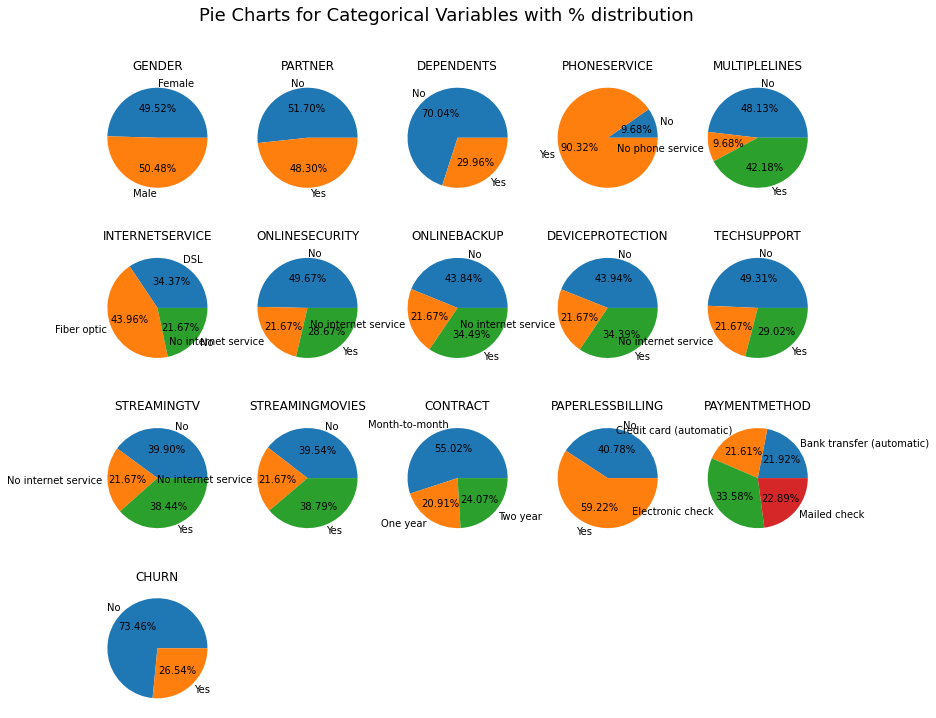

In [1378]:
pie_chart(custDF)

D. Share insights for Q2.c. [2 Marks]

```

1. Pretty much equal number of Female and Male in Gender attribute
2. Pretty much equal number of Partner yes and no
3. 70% customers have no dependents
4. more than 90% of customer have yes Phoneservices, only 9% have no phoneservice. This feature will not add value to the model because of low variance
5. pretty much equal number of multiplelines yes and no
6. Internetservice is having 43% fiber Optics, 34% DSL and remaining no
7. Pretty much 50% of customer have no onlinesecurity, 28% yes online security
8. more than 1/3rd of customer have no onlinebackup and 1/3rd of customers have yes onlinebackup
9. more than 1/3rd of customer have no deviceprotection and 1/3rd have yes onlinebackup
10. Pretty much 50% of customer have no techsupport, 29% yes  techsupport
11. Pretty much equal number of StreamingTV yes and no
12. Pretty much equal number of StreamingMovies yes and no
13. More than 50% customer have month-to-month contract, 2yr contract are 24% and 1yr contract are 20%
14. 33% customers will do payment by Electoronic check and pretty much equal payment by credit card, bank statment and mailed check
15. 73% customer are not Churn and 26% customer are churn


```

E. Encode all the appropriate Categorical features with the best suitable approach. [2 Marks]

In [1379]:
replaceStruct = {
                "gender": {"Male": 0, "Female":1 },
                "Contract": {"Month-to-month": 1, "One year":2 , "Two year": 3},
                "MultipleLines":{"No": 1, "Yes": 2 , "No phone service": -1},
                "OnlineBackup":{"No": 1, "Yes": 2 , "No internet service": -1},
                "StreamingMovies":{"No": 1, "Yes": 2 , "No internet service": -1},
                "StreamingTV":{"No": 1, "Yes": 2 , "No internet service": -1},
                "TechSupport":{"No": 1, "Yes": 2 , "No internet service": -1},
                "DeviceProtection":{"No": 1, "Yes": 2 , "No internet service": -1},
                "OnlineSecurity":{"No": 1, "Yes": 2 , "No internet service": -1},
                "PaperlessBilling":     {"No": 0, "Yes": 1 },
                "PhoneService":     {"No": 0, "Yes": 1 }, 
                "Dependents":     {"No": 0, "Yes": 1 }, 
                "Partner":     {"No": 0, "Yes": 1 } ,
                "Churn":     {"No": 0, "Yes": 1 } 
                    }
oneHotCols=["PaymentMethod","InternetService"]

In [1380]:
custDF_Encode=custDF.replace(replaceStruct)
custDF_OneHot=pd.get_dummies(custDF_Encode, columns=oneHotCols, drop_first=True)

In [1381]:
for feature in custDF_OneHot.columns: # Loop through all columns in the dataframe
    if custDF_OneHot[feature].dtype == 'category': # Only apply for columns with categorical strings
        custDF_OneHot[feature] = custDF_OneHot[feature].astype(int)# Replace strings with an integer

```

Encoding approach:

    1. replace gender string, male with 0 and female with 1
    2. replace contract string, Month-to-month with 1, One year with 2  and Two year with 3
    3. similary replace no with 1, yes with 2 and no phone/internet service with -1  for MultipleLines, OnlineBackup,  StreamingMovies, StreamingTV,TechSupport, DeviceProtection, OnlineSecurity
    replace no with 0 and yes with 1 for PaperlessBilling, PhoneService, Dependents, Partner, Churn
    4. one hot encode for PaymentMethod, InternetService
    
    
```

In [1382]:
custDF_OneHot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   gender                                 7043 non-null   int64  
 2   SeniorCitizen                          7043 non-null   int64  
 3   Partner                                7043 non-null   int64  
 4   Dependents                             7043 non-null   int64  
 5   tenure                                 7043 non-null   int64  
 6   PhoneService                           7043 non-null   int64  
 7   MultipleLines                          7043 non-null   int64  
 8   OnlineSecurity                         7043 non-null   int64  
 9   OnlineBackup                           7043 non-null   int64  
 10  DeviceProtection                       7043 non-null   int64  
 11  Tech

F. Split the data into 80% train and 20% test. [1 Marks]

In [1383]:
X = custDF_OneHot.drop(["Churn","customerID"] , axis = 1) # dropping target and customerid
y = custDF_OneHot["Churn"]                                

In [1384]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=1) # Splitting data into 80% train and 20% test

print('\n The data set has been split into train and test in the proportion of 80:20 \n')


 The data set has been split into train and test in the proportion of 80:20 



G. Normalize/Standardize the data with the best suitable approach. [2 Marks]

In [1385]:
from scipy.stats import zscore

cols = ['tenure','MonthlyCharges','TotalCharges']
new_cols = [f"{c}_zscore" for c in cols]

X_train[new_cols]=  X_train[cols].apply(zscore)  
X_train.drop(cols, axis = 1)

X_test[new_cols]=  X_test[cols].apply(zscore)  
X_test.drop(cols, axis = 1)
print('\n I have applied scaling after splitting data into train and test\n')


 I have applied scaling after splitting data into train and test



3. Model building and Improvement: [10 Marks]

A. Train a model using XGBoost. Also print best performing parameters along with train and test performance. [5 Marks] 


In [1386]:
#!pip install xgboost

In [1387]:
from xgboost import XGBClassifier

xgbc = XGBClassifier()
xgbc.fit(X_train, y_train) 

y_predict = xgbc.predict(X_test)


```
Above step builds a base XGBoot model, predictions are stored y_predict
```

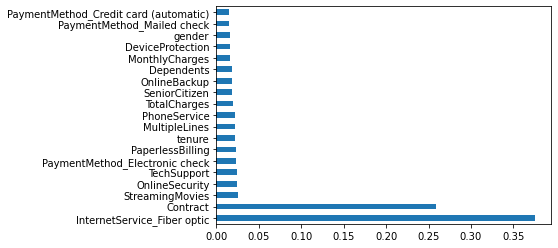

In [1388]:
(pd.Series(xgbc.feature_importances_, index=X_train.columns)
   .nlargest(19)
   .plot(kind='barh')) ;

```
InternetService_Fiber optic  feature is having highest importance, Folled by Contract

```

Confusion Matrix


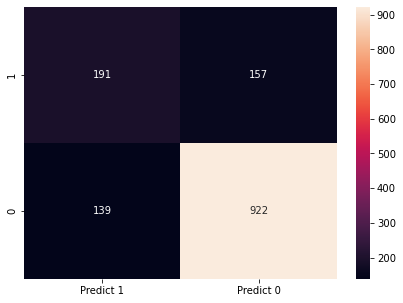

In [1390]:
from sklearn import metrics
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, pred, labels=[1,0])


df_cm = pd.DataFrame(cm, index = [i for i in [1,0]],
                  columns = [i for i in ['Predict 1','Predict 0']])

plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='g');

In [1391]:
from sklearn import metrics
print("Classification Report")
print(metrics.classification_report(y_test, pred, labels=[1,0]))


Classification Report
              precision    recall  f1-score   support

           1       0.58      0.55      0.56       348
           0       0.85      0.87      0.86      1061

    accuracy                           0.79      1409
   macro avg       0.72      0.71      0.71      1409
weighted avg       0.79      0.79      0.79      1409



In [1392]:
print('Area Under the Curve :', metrics.roc_auc_score(y_test, y_predict))

Area Under the Curve : 0.7288748415613118


```

AUC, is the ability to predict churn or not,  0.72 is considered acceptable.


```

B. Improve performance of the XGBoost as much as possible. Also print best performing parameters along with train and test performance. [5 Marks]

In [1393]:
custDF= custDF.replace({"Churn":     {"No": 0, "Yes": 1 } })
custDF['SeniorCitizen']=custDF['SeniorCitizen'].astype('category')
X = custDF.drop(["Churn","customerID"] , axis = 1)
y = custDF["Churn"]

In [1394]:
from sklearn.model_selection import train_test_split

#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=1)

categorical_features=X_train.select_dtypes(include=['category']).columns.tolist()

X_train_oneHot=pd.get_dummies(X_train, columns=categorical_features, drop_first=True)
X_test_oneHot=pd.get_dummies(X_test, columns=categorical_features, drop_first=True)

print('\n 80% of the data are in the train set. \n 20% of the data are in the test set.\n')

print('\n The Given data set has Churn 0  #',sum(y ==0),'\t Churn 1 #', sum( y ==1))
print('\n Train data set has Churn 0      #',sum(y_train ==0),'\t Churn 1 #', sum( y_train ==1))
print('\n Test data set has Churn 0       #',sum(y_test ==0),'\t Churn 1 #', sum( y_test ==1))


 80% of the data are in the train set. 
 20% of the data are in the test set.


 The Given data set has Churn 0  # 5174 	 Churn 1 # 1869

 Train data set has Churn 0      # 4113 	 Churn 1 # 1521

 Test data set has Churn 0       # 1061 	 Churn 1 # 348


```

74% for class 0 and 26% for class 1. The data set is unbalanced, therefore I'll use SMOTE to balance it so that it's 50/50.

As a result, the target variable needs to be balanced at 50:50.


```

In [1395]:
from imblearn.over_sampling import SMOTENC

categorical_features_index = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,23, 24, 25, 26, 27, 28, 29] 

smote = SMOTENC(categorical_features= categorical_features_index, random_state=1)
X_train_oneHot_smote, y_train_smote = smote.fit_resample(X_train_oneHot, y_train)

print('\n Prior to SMOTE, Churn 0  #',sum(y_train == 0 ),'\t Churn 1   #', sum( y_train ==1))
print('\n Post  to SMOTE, Churn 0  #',sum(y_train_smote == 0 ),'\t Churn 1   #', sum( y_train_smote ==1), '\n')



 Prior to SMOTE, Churn 0  # 4113 	 Churn 1   # 1521

 Post  to SMOTE, Churn 0  # 4113 	 Churn 1   # 4113 



```
As you can see, 1s and os values in the churn have been balanced using smote, and after smote, class 1 and class are split 50:50.


```

In [1396]:

from scipy.stats import zscore

numeric_features=X_train.select_dtypes(include=[int,float]).columns.tolist()
new_numeric_features = [f"{c}_zscore" for c in numeric_features]

X_train_oneHot_smote[new_numeric_features]=  X_train_oneHot_smote[numeric_features].apply(zscore)  
X_train_oneHot_smote.drop(numeric_features, axis = 1)

X_test_oneHot[new_numeric_features]=  X_test_oneHot[numeric_features].apply(zscore)  
X_test_oneHot.drop(numeric_features, axis = 1)


,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_zscore,MonthlyCharges_zscore,TotalCharges_zscore
3381,0,0,0,0,1,0,0,0,0,0,...,1,1,0,1,0,0,0,0.335987,0.504761,0.453975
6180,0,1,0,0,1,0,1,1,0,0,...,1,0,1,1,0,0,0,1.353363,1.255673,1.844448
4829,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,-0.844170,-0.655741,-0.779980
3737,0,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,1,-1.129035,-0.469262,-0.901064
4249,0,0,1,1,1,0,0,0,0,0,...,1,1,0,1,0,0,1,-0.925560,0.040227,-0.720101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2563,1,1,0,0,1,0,1,1,0,0,...,1,0,0,0,0,0,1,-0.315134,1.373888,0.160313
2028,0,0,0,0,1,0,0,0,1,1,...,0,0,1,0,0,0,1,-0.722084,-1.501558,-0.865034
2899,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1.556839,-0.357707,0.704570
3474,1,1,1,1,1,0,1,1,0,0,...,0,0,0,1,0,1,0,1.312668,0.701230,1.498760


```

Tunning XGBClassifier

1. The input has been properly SMOKED, Scaled and One Hot encoded.
2. Input features with near zero variance and high correlation have been eliminated.


```

In [1397]:
estimator = XGBClassifier( objective= 'binary:logistic', nthread=4,  seed=42 )
parameters = {  'max_depth': [3,4,5], 'learning_rate': [0.01, 0.1, 0.2], 'subsample': [0.6, 0.7, 0.8], 'reg_alpha': [0.0, 1.0],  'reg_lambda': [0.0, 1.0] }

grid_search = GridSearchCV(estimator=estimator, param_grid=parameters, scoring =  {"AUC": "roc_auc", "Accuracy": make_scorer(accuracy_score)}, refit="AUC", n_jobs = 10,cv = 3, verbose=True)
grid_search.fit(X_train_oneHot_smote, y_train_smote)


Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, predictor=None, ...),
             n_jobs=10,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'reg_alpha': [0.0, 1.0],
                         'reg_lambda': [0.0, 1.0],
                         'subsample': [0.6, 0.7, 0.8]},
             refit='AUC',
             scoring={'AUC': 'roc_auc',
                      'Accuracy': make_scorer(accuracy_score)},
             verbose=True)

In [1398]:
print('\n Insights : \n\n The XGBoost\'s best parameter after tuning is', grid_search.best_params_)
print('\n The XGBoost\'s best score after tuning is', grid_search.best_score_,'\n')


 Insights : 

 The XGBoost's best parameter after tuning is {'learning_rate': 0.2, 'max_depth': 5, 'reg_alpha': 1.0, 'reg_lambda': 0.0, 'subsample': 0.7}

 The XGBoost's best score after tuning is 0.9073706096004504 



In [1399]:
xgbc_grid_search = XGBClassifier(learning_rate= 0.2, max_depth= 5, reg_alpha=1.0, reg_lambda=1.0, subsample= 0.8)
    
xgbc_grid_search.fit(X_train_oneHot_smote, y_train_smote) 

y_predict_grid_search = xgbc_grid_search.predict(X_test_oneHot)


In [1400]:
print()
print('For a tuned  XGBoost model, score on training data',xgbc_grid_search.score(X_train_oneHot_smote, y_train_smote))
print('For a tuned  XGBoost model, score on testing data',xgbc_grid_search.score(X_test_oneHot, y_test))
print()


For a tuned  XGBoost model, score on training data 0.8989788475565281
For a tuned  XGBoost model, score on testing data 0.7799858055358411



Confusion Matrix


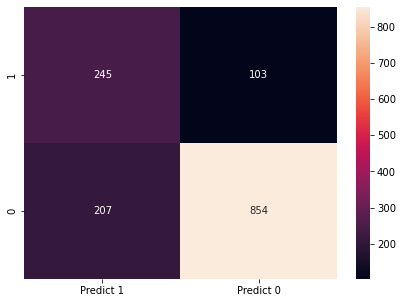

In [1401]:
from sklearn import metrics
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, y_predict_grid_search, labels=[1,0])


df_cm = pd.DataFrame(cm, index = [i for i in [1,0]],
                  columns = [i for i in ['Predict 1','Predict 0']])

plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='g');

In [1402]:
print('\n For a tuned  XGBoost model, Classification Report\n')
print(metrics.classification_report(y_test, y_predict_grid_search, labels=[1,0]))


 For a tuned  XGBoost model, Classification Report

              precision    recall  f1-score   support

           1       0.54      0.70      0.61       348
           0       0.89      0.80      0.85      1061

    accuracy                           0.78      1409
   macro avg       0.72      0.75      0.73      1409
weighted avg       0.81      0.78      0.79      1409



```

After tuning XGBoost model,

1. Recall : +15%
2. f1-score: +5%

The true positive rate, Recall, rose by 15%. i.e. After tuning, the model is 15% more likely to accurately identify the consumer who will be leaving.

f1 score incre increased to 5%. The model’s ability to both capture positive cases and be accurate with the cases it does capture is 0.61, which is commonly seen as an OK value.


```

In [1403]:
print('Area Under the Curve :', metrics.roc_auc_score(y_test, y_predict_grid_search))

Area Under the Curve : 0.7544620126317614


```

AUC, is the ability to predict churn or not,  0.75 is considered acceptable.

```

## PART B

• DOMAIN: IT  
• CONTEXT: The purpose is to build a machine learning workflow that will work autonomously irrespective of Data and users can save efforts  
involved in building workflows for each dataset.  
• PROJECT OBJECTIVE: Build a machine learning workflow that will run autonomously with the csv file and return best performing model.  

• STEPS AND TASK [30 Marks]: 
1. Build a simple ML workflow which will accept a single ‘.csv’ file as input and return a trained base model that can be used for predictions. You can use 1 Dataset from Part 1 (single/merged).


```
I will be implementing below functions

    1. Reading a file and providing basic inforamtion about the file, merging file
        def read_file(fileType, fileName)
        def data_type(df)
        def merge(df1, df2, joinKey)

    2. Data pre processing - null check, type conversion from string to float/category/int
        def null_count(df)
        def null_percentage(df)
        def string_to_category(df, exclude)
        def string_to_float(df, include)
        def impute_missing_by_median(df, include)
        
    3. UniVariate analysis - finding outliers, 5 Number summary(box plot), categorical count plots(bar plot)
        def outliers(df)
        def box_plot(df)
        def categorical_count_plot(df)
        
    4. Bi variate and multi variate analysis
        def pair_plot(df)
        def corr_plot(df)

    5. Data processing
        def one_hot_encode(X_split)
        def smote(categorical_features_index, X_train_oneHot, y_train) 
        def normalize_data(X_train, X_test, cols)

    6. Model Build and performance
        def feature_importance(X_train, model)
        def split_data(df,excludeCol, target, testSize)
        def train_model(model, X_train_oneHot_smote_normal, X_test_one_hot_normal, y_train) 
        def score(model, X_test, y_test)
        def AUC(y_test, y_pred)
        def confusion_matrix(model_name,y_test, y_predict,labels)

```

2. Create separate functions for various purposes.

In [1404]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from xgboost import XGBClassifier
from sklearn import metrics
from imblearn.over_sampling import SMOTENC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
    
#read the file
def read_file(fileType, fileName):
    df = pd.DataFrame({'A' : []})
    if fileType == 'csv' :
        df= pd.read_csv(fileName)
    return df

#Merge both the DataFrames on join key
def merge(df1, df2, joinKey):
    return pd.merge(df1,df2, on=joinKey)

# returns data type of attributes,#of columns, #of rows the DataFrame
def data_type(df):
    return df.info()

# returns the null counts of columns of DataFrame
def null_count(df):
    return df.isna().sum()
    
#return null values percentage
def null_percentage(df):
    return  100 * (df.isnull().sum()/len(df))


# converts object datatype (string) to Category type.
def string_to_category(df, exclude):
    for feature in df.columns: # Loop through all columns in the dataframe
        if (not feature in exclude and df[feature].dtype == 'object' ): # Only apply for columns with categorical strings
            df[feature] = pd.Categorical(df[feature])# Replace strings with an integer
    return df

# converts String(Object) dataype to Float datatype
def string_to_float(df, include):
    for feature in df.columns: # Loop through all columns in the dataframe
        if (feature in include and df[feature].dtype == 'object' ): # Only apply for columns with categorical strings
            df[feature] = pd.to_numeric(df[feature], errors='coerce') # Replace strings with a Float
    return df

#Check for outliers   
def outliers(df):
    print('\n Outliers for :- \n',)
    numeric_col = df.columns[pd.Series(df.columns).apply(lambda x : df[x].dtype == 'float64')]  # Non object columns
    for column in numeric_col:
        iqr=df[column].quantile(q=.75) - df[column].quantile(q=.25)
        upperfence=df[column].quantile(q=.75)+1.5*iqr
        lowerfence=df[column].quantile(q=.25)-1.5*iqr
        outliers=df[df[column] > upperfence]
        lowoutliers=df[df[column] < lowerfence]
        print(column,' : \n The number of outliers greater than the upper fence = ',outliers.shape[0])
        print(' The number of lowoutliers greater than the upper fence = ',lowoutliers.shape[0])

def box_plot(df):
    print('\n Box Plot - 5 Number summary for Numeric features \n')
    numeric_col = df.columns[pd.Series(df.columns).apply(lambda x : df[x].dtype == 'float64')]  # Non object columns

    plt.figure(figsize = (20,3))

    j = 1
    for i in numeric_col:
        plt.subplot(1,2,j)
        sns.boxplot(x=df[i]);
        j += 1
    plt.show()

def categorical_count_plot(df) :
    categorical_col = df.drop(['customerID'], axis=1).columns[pd.Series(df.drop(['customerID'], axis=1).columns).apply(lambda x : df[x].dtype == 'category' )] 
    plt.figure(figsize=(15, 15))
    plt.subplots_adjust(hspace=0.2)
    plt.subplots_adjust(wspace=0.2)
    plt.suptitle("Bar Charts for Categorical Variables ", fontsize=18, y=0.95)
    cols=4
    rows = len(categorical_col) // cols + (len(categorical_col) % cols > 0)

    for n, i in enumerate(categorical_col):
        ax = plt.subplot(rows, cols, n + 1)
        df[i].value_counts().plot(kind='bar',rot=0, ax=ax)
        ax.set_title(i.upper())
        ax.set_xlabel("")
        ax.set_ylabel("")
    plt.show()
    
def pair_plot(df):
    plt.figure(figsize = (20,3))
    sns.pairplot(df.drop(['SeniorCitizen'], axis=1), hue="Churn");
    plt.show()
    
def corr_plot(df):
    plt.figure(figsize = (15,3))
    sns.heatmap(df.drop(['SeniorCitizen'], axis=1).corr(), annot=True);
    plt.show()
    
def impute_missing_by_median(df, include):
    for feature in df.columns: # Loop through all columns in the dataframe
        if (feature in include ): # Only apply for columns with categorical strings
            df[feature]=df[feature].fillna(df[feature].median()) # Impute missing By Median
    return df

def split_data(df,excludeCol, target, testSize):
    X = df.drop(excludeCol , axis = 1)
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testSize, random_state=1)
    return X_train, X_test, y_train, y_test

    
def one_hot_encode(X_split):
    categorical_features=X_split.select_dtypes(include=['category']).columns.tolist()
    return pd.get_dummies(X_split, columns=categorical_features ,drop_first=True)


def smote(categorical_features_index, X_train_oneHot, y_train) :
    sm = SMOTENC(categorical_features= categorical_features_index, random_state=1)
    X_train_oneHot_smote, y_train_smote = sm.fit_resample(X_train_oneHot, y_train)
    return X_train_oneHot_smote, y_train_smote

def normalize_data(X_train, X_test, cols):
   
    new_cols = [f"{c}_zscore" for c in cols]

    X_train[new_cols]=  X_train[cols].apply(zscore)  
    X_train.drop(cols, axis = 1)

    X_test[new_cols]=  X_test[cols].apply(zscore)  
    X_test.drop(cols, axis = 1)
    return X_train,X_test

def feature_importance(X_train, model):
    return pd.DataFrame(model.feature_importances_, columns = ["Imp"], index = X_train.columns)

def train_model(model, X_train_oneHot_smote_normal, X_test_one_hot_normal, y_train) :
        model.fit(X_train_oneHot_smote_normal, y_train ) 
        y_predict = model.predict(X_test_one_hot_normal)
        return model, y_predict
        
def score(model, X_test, y_test):
    return model.score(X_test, y_test)

def AUC(y_test, y_predict):
    return metrics.roc_auc_score(y_test, y_predict)

def confusion_matrix(y_test, y_predict,labels):
    print('\n Confusion Matrix  :\n')
    cm=metrics.confusion_matrix(y_test, y_predict, labels=labels)

    df_cm = pd.DataFrame(cm, index = [i for i in labels],
                      columns = [i for i in labels])
    plt.figure(figsize = (7,5))
    sns.heatmap(df_cm, annot=True,fmt='g');
    plt.show()

def classification_report(y_test, y_predict, label) :
    print('\n Classification Report :\n')
    return metrics.classification_report(y_test, y_predict, labels=label)


In [1405]:
def data_preprocess(df) :
    print('\n Original data set info\n')
    data_type(df)
    print('\n ---------------------------------------------------------\n')
    
    df=string_to_float(df, ['TotalCharges'])
    df=string_to_category(df, ['customerID'])
   
    print('\n Null Counts \n\n',null_count(df),'\n ---------------------------------------------------------\n')
    print('\n Null Percentage \n\n',null_percentage(df))
    print('\n 15% values are missing in TotalCharges')
    print('\n No missing data in remaining all other columns')
    print('\n ---------------------------------------------------------\n')
    data_type(df)
    print('\n ---------------------------------------------------------\n')
    return df

def data_analysis(df) :
 
    box_plot(df)
    print('\nGives 5 number summary for numerical values.\n')
    print('\nTotalCharges has mean=2243 and median=1400. As mean is grater than the median of tournament attribute, it has positive or right skewed distribution\n')
    print('No points outside the wishker, So, there are no outliers. \n\n ---------------------------------------------------------\n')
  
    outliers(df)
    print('\n ---------------------------------------------------------\n')
    categorical_count_plot(df) 


    print('\n   1. Pretty much equal number of Female and Male in Gender attribute \n \
                2. Pretty much equal number of Partner yes and no \n \
                3. 70% customers have no dependents \n \
                4. more than 90% of customer have yes Phoneservices, only 9% have no phoneservice. This feature will not add value to the model because of low variance \n \
                5. pretty much equal number of multiplelines yes and no \n \
                6. Internetservice is having 43% fiber Optics, 34% DSL and remaining no \n \
                7. Pretty much 50% of customer have no onlinesecurity, 28% yes online security \n \
                8. more than 1/3rd of customer have no onlinebackup and 1/3rd of customers have yes onlinebackup \n \
                9. more than 1/3rd of customer have no deviceprotection and 1/3rd have yes onlinebackup \n \
                10. Pretty much 50% of customer have no techsupport, 29% yes  techsupport \n \
                11. Pretty much equal number of StreamingTV yes and no \n \
                12. Pretty much equal number of StreamingMovies yes and no \n \
                13. More than 50% customer have month-to-month contract, 2yr contract are 24% and 1yr contract are 20% \n \
                14. 33% customers will do payment by Electoronic check and pretty much equal payment by credit card, bank statment and mailed check \n \
                15. 73% customer are not Churn and 26% customer are churn \n \
          ')



    print('\n ---------------------------------------------------------\n')
    pair_plot(df)
    
    print('\nThere is a linear positive association from TotalCharges to tenure,MonthlyCharges. \n')
    print('\nThe histogram of MonthlyCharges and TotalCharges shows that the shape is right skewed')

    print('\n ---------------------------------------------------------\n')
    corr_plot(df)
    
    print('\n Strong positive correlation of 0.83 between TotalCharges and tenure \n')
    print('\n Also MonthlyChares and TotalCharges are having positive correlationof 0.65 \n ') 

def data_processing(X_train, X_test, y_train):
    
    X_train_one_hot = one_hot_encode (X_train)
    X_test_one_hot = one_hot_encode (X_test)
   
    X_train_oneHot_smote, y_train_smote = smote ([3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,23, 24, 25, 26, 27, 28, 29] , X_train_one_hot , y_train)
    
    numeric_features=X_train.select_dtypes(include=[int,float]).columns.tolist()
    
    X_train_oneHot_smote_normal, X_test_one_hot_normal = normalize_data(X_train_oneHot_smote, X_test_one_hot, numeric_features)
        
    return X_train_oneHot_smote_normal, X_test_one_hot_normal, y_train_smote

def build_model(df, model):
    df= df.replace({"Churn":     {"No": 0, "Yes": 1 } })
    df['SeniorCitizen']=df['SeniorCitizen'].astype('category')
    df=impute_missing_by_median(df,['TotalCharges'])
    
    X_train, X_test, y_train, y_test = split_data(df,['customerID','Churn'],'Churn',0.2)
    
    X_train_oneHot_smote_normal, X_test_one_hot_normal, y_train_smote = data_processing( X_train, X_test, y_train)

    model, y_predict = train_model(model, X_train_oneHot_smote_normal, X_test_one_hot_normal, y_train_smote) 
    
    
    return X_train_oneHot_smote_normal, X_test_one_hot_normal, y_train_smote, y_test, y_predict, model
    
def model_performance(model_name, model, X_train_oneHot_smote_normal, X_test_one_hot_normal, y_train_smote, y_test, y_predict):
    print('\n---Perfomance of ', model_name,' :\n ')
    print('\nScore on train data #',model.score(X_train_oneHot_smote_normal, y_train_smote))
    print('\n Score on test data  #',model.score(X_test_one_hot_normal, y_test))
    confusion_matrix(y_test, y_predict,[1,0])
    print(classification_report(y_test, y_predict, [1,0]))
    
    return metrics.precision_score(y_test, y_predict), metrics.recall_score(y_test, y_predict),metrics.f1_score(y_test, y_predict), metrics.accuracy_score(y_test, y_predict)
   
    
    
    

3. Various base models should be trained to select the best performing model.


 Original data set info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling

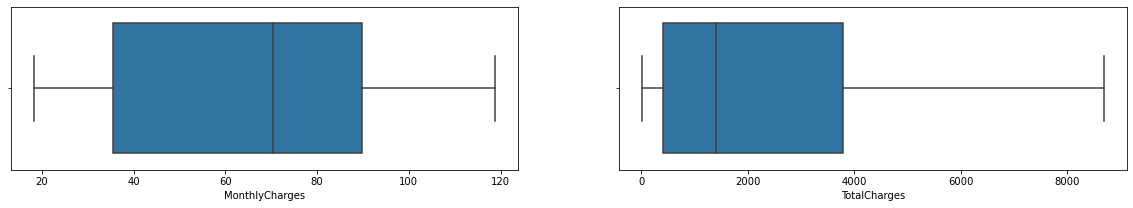


Gives 5 number summary for numerical values.


TotalCharges has mean=2243 and median=1400. As mean is grater than the median of tournament attribute, it has positive or right skewed distribution

No points outside the wishker, So, there are no outliers. 

 ---------------------------------------------------------


 Outliers for :- 

MonthlyCharges  : 
 The number of outliers greater than the upper fence =  0
 The number of lowoutliers greater than the upper fence =  0
TotalCharges  : 
 The number of outliers greater than the upper fence =  0
 The number of lowoutliers greater than the upper fence =  0

 ---------------------------------------------------------



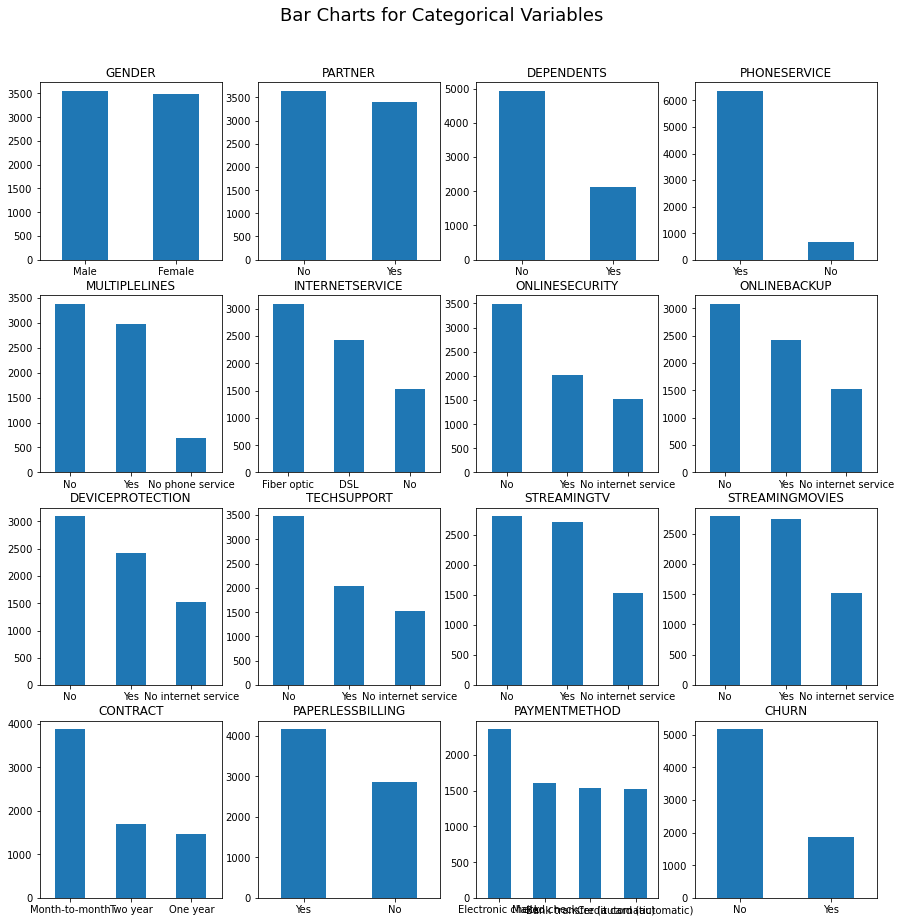


   1. Pretty much equal number of Female and Male in Gender attribute 
                 2. Pretty much equal number of Partner yes and no 
                 3. 70% customers have no dependents 
                 4. more than 90% of customer have yes Phoneservices, only 9% have no phoneservice. This feature will not add value to the model because of low variance 
                 5. pretty much equal number of multiplelines yes and no 
                 6. Internetservice is having 43% fiber Optics, 34% DSL and remaining no 
                 7. Pretty much 50% of customer have no onlinesecurity, 28% yes online security 
                 8. more than 1/3rd of customer have no onlinebackup and 1/3rd of customers have yes onlinebackup 
                 9. more than 1/3rd of customer have no deviceprotection and 1/3rd have yes onlinebackup 
                 10. Pretty much 50% of customer have no techsupport, 29% yes  techsupport 
                 11. Pretty much equal number of StreamingTV y

<Figure size 1440x216 with 0 Axes>

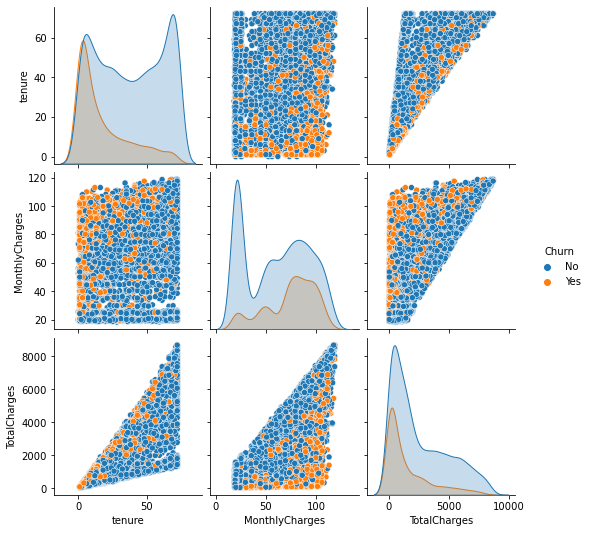


There is a linear positive association from TotalCharges to tenure,MonthlyCharges. 


The histogram of MonthlyCharges and TotalCharges shows that the shape is right skewed

 ---------------------------------------------------------



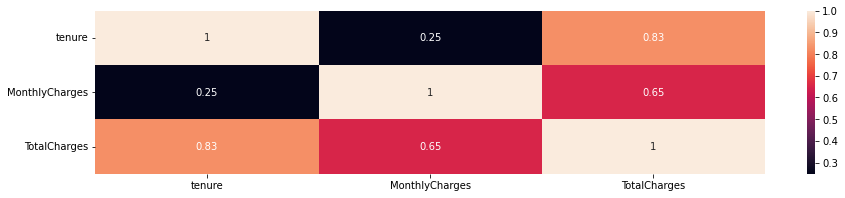


 Strong positive correlation of 0.83 between TotalCharges and tenure 


 Also MonthlyChares and TotalCharges are having positive correlationof 0.65 
 

---Perfomance of  Cat Boost Classifier  :
 

Score on train data # 0.899465110624848

 Score on test data  # 0.7735982966643009

 Confusion Matrix  :



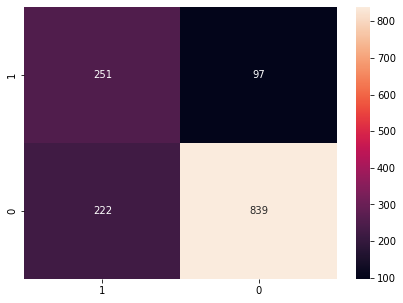


 Classification Report :

              precision    recall  f1-score   support

           1       0.53      0.72      0.61       348
           0       0.90      0.79      0.84      1061

    accuracy                           0.77      1409
   macro avg       0.71      0.76      0.73      1409
weighted avg       0.81      0.77      0.78      1409


---Perfomance of  XGBClassifier  :
 

Score on train data # 0.9353270119134451

 Score on test data  # 0.7920511000709723

 Confusion Matrix  :



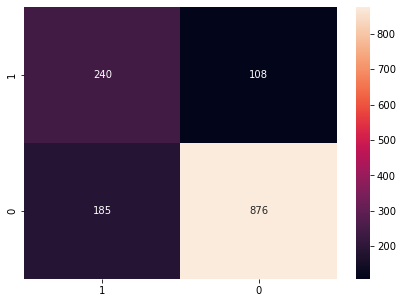


 Classification Report :

              precision    recall  f1-score   support

           1       0.56      0.69      0.62       348
           0       0.89      0.83      0.86      1061

    accuracy                           0.79      1409
   macro avg       0.73      0.76      0.74      1409
weighted avg       0.81      0.79      0.80      1409


---Perfomance of  RandomForestClassifier  :
 

Score on train data # 0.9986627765621201

 Score on test data  # 0.7877927608232789

 Confusion Matrix  :



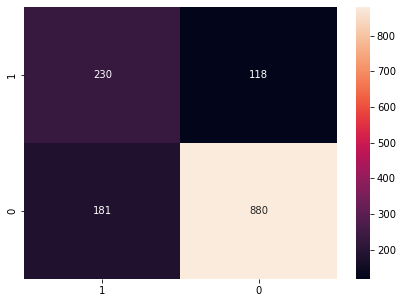


 Classification Report :

              precision    recall  f1-score   support

           1       0.56      0.66      0.61       348
           0       0.88      0.83      0.85      1061

    accuracy                           0.79      1409
   macro avg       0.72      0.75      0.73      1409
weighted avg       0.80      0.79      0.79      1409


 ---------------------------------------------------------

 
 Various base models performance metrics

                        Precision    ReCall  f1-Score  Accuracy
Model                                                          
Cat Boost Classifier     0.530655  0.721264  0.611449  0.773598
XGBClassifier            0.564706  0.689655  0.620957  0.792051
RandomForestClassifier   0.559611  0.660920  0.606061  0.787793

 
 CatBoost Model is providing high ReCall of 72% than XGB - 68% and RandomForest -66%. i.e, CatBoost Mode is more likely to accurately identify the consumer who will be Churning. 
 
 f1 score of CatBoost model is higher

In [1406]:
def main():
    
    df1=read_file('csv','TelcomChurn1.csv')
    df2=read_file('csv','TelcomChurn2.csv')
    df=merge(df1,df2,'customerID')

    # Data preprocessing - null check, type conversion from string to float/category/int
    df=data_preprocess(df)
    
    # Data Analysis - Uni, Bi and Multi Variate 
    data_analysis(df)

    # Train and build Model
    cbc = CatBoostClassifier(random_state=1, verbose=False)        
    xgbc = XGBClassifier(random_state=1)   
    rfc = RandomForestClassifier(random_state=1)
    
    result = {}   # Create an empty dictionary to later use to store metrics of each of the models
    
    for model, name  in zip([cbc, xgbc, rfc], ['Cat Boost Classifier', 'XGBClassifier', 'RandomForestClassifier']):
        
        X_train_oneHot_smote_normal, X_test_one_hot_normal, y_train_smote, y_test, y_predict, model = build_model(df, model)
        result[name] = model_performance (name, model, X_train_oneHot_smote_normal, X_test_one_hot_normal, y_train_smote, y_test, y_predict )
    
    
    result1 = pd.DataFrame(np.array(list(result.values()))[:,:],    # make a dataframe out of the metrics from result dictionary 
                       columns= ['Precision', 'ReCall', 'f1-Score', 'Accuracy'],
                      index= result.keys())   # use the model names as index

    result1.index.name = 'Model'   # name the index of the result1 dataframe as 'Model'

    print('\n ---------------------------------------------------------\n\n \n Various base models performance metrics\n')
    print(result1)  
    


    print('\n \n CatBoost Model is providing high ReCall of 72% than XGB - 68% and RandomForest -66%. i.e, CatBoost Mode is more likely to accurately identify the consumer who will be Churning. \n \n f1 score of CatBoost model is higher than RandomForest and almost similar to XGB. i.e. The CatBoost model has ability to both capture positive cases and be accurate with the cases it does capture is 0.61, which is commonly seen as an OK value.')


    # Save Pickle file  for the best performing model
    model_to_pickle_file(cbc , 'catboost.pkl')
    
    # Save Pickle file  for the best performing model
    model_to_pickle_file(cbc , 'catboost.pkl')
    
    print('\n ---------------------------------------------------------\n\n \n  Saved the best performing model - CatBoost to Pickle file - catboost.pkl\n')


if __name__ == "__main__":
    main()


4. Pickle file should be saved for the best performing model.  

In [1407]:
print('\n Saved the best performing model - CatBoost to Pickle file - catboost.pkl \n \n ---------------------------------------------------------\n')
      


 Saved the best performing model - CatBoost to Pickle file - catboost.pkl 
 
 ---------------------------------------------------------

